In [1]:
%matplotlib inline

In [133]:
import requests
import time
import pickle
import random
import pandas as pd
import numpy as np
import seaborn as sns
import mpld3
from sklearn.neighbors.kde import KernelDensity
sns.set()
mpld3.enable_notebook()
token = "EAACEdEose0cBAP6m1ZBOUFScr0CNRCmuuTrVlGPqd6rxVfPNMXHFJXmP9AloXBJg4y12Lvhr942TExZAojJ9TnMvs9dmZAo9GwjRBgIW74kfQap3VvRzTTs8AZCTCrdpLoSqQks8IU87ofeZAFRXhjLpiCstYneOgjlhSXZC1FKl8RhU40G8WzP0PLuZBWXvvm7vLZAC8vAa0gZDZD"

In [3]:
def facebook_request(req):
    r = requests.get("https://graph.facebook.com/v2.11/" + req, {"access_token":token})
    return r

In [14]:
#req = "bbcnews?fields=id,name,posts.limit(300){shares,created_time}"
#results = facebook_request(req).json()
#pickle.dump(results,open("bbcnews.gz","wb"))
#data = pickle.load(file=open("bbcnews.gz","rb"))

In [51]:
li_pages = ["bbcnews","DonaldTrump","AFPfra"]
li_groups_nb = ["1261657253939349"]
li_groups_names =["Penser c'est chouette"]

for page in li_pages:    
    req = page + "?fields=id,name,posts.limit(500){shares,created_time}"
    results = facebook_request(req).json()
    file_name = page + ".gz"
    pickle.dump(results,open(file_name,"wb"))

for nb in li_groups_nb :    
    
    req = nb + "?fields=id,name,feed.limit(500)"
    results = facebook_request(req).json()
    file_name = nb + ".gz"
    pickle.dump(results,open(file_name,"wb"))

In [106]:
li_df_pages = []

for page in li_pages:
    
    file_name = page + ".gz"
    data = pickle.load(open(file_name,"rb"))
    df = pd.io.json.json_normalize(data=data['posts']['data'])
    li_df_pages.append(df)


def make_posts_dataframe(fields):
    df = pd.concat([x['created_time'] for x in li_df_pages], axis=1)
    df.columns = li_pages
    return df

df_time = make_posts_dataframe("created_time").apply(lambda x: pd.DatetimeIndex(x))

In [107]:
li_df_feed = []

for (nb,name) in zip(li_groups_nb, li_groups_names):
    
    file_name = nb + ".gz"
    data = pickle.load(open(file_name,"rb"))    
    df_feed = pd.io.json.json_normalize(data=data['feed']['data']).replace(np.NaN,"blank").drop("id", axis=1)
    df_feed = df_feed[df_feed["story"].apply(lambda x: "shared" in x)]
    df_feed.index = range(len(df_feed.index))
    df_feed["updated_time"] = pd.DatetimeIndex(df_feed["updated_time"])
    li_df_feed.append(df_feed)

df_time_feed = pd.concat([x['updated_time'] for x in li_df_feed], axis=1)
df_time_feed.columns = li_groups_names

In [108]:
df_time = df_time.join(df_time_feed)
df_time

,bbcnews,DonaldTrump,AFPfra,Penser c'est chouette
0,2017-11-14 09:21:36,2017-11-14 08:12:55,2017-11-14 10:00:00,2017-11-14 09:06:49
1,2017-11-14 08:28:07,2017-11-14 03:00:00,2017-11-13 22:01:00,2017-11-14 00:35:28
2,2017-11-14 07:34:32,2017-11-14 01:12:31,2017-11-13 20:00:00,2017-11-13 16:53:13
3,2017-11-14 07:11:16,2017-11-13 21:37:00,2017-11-13 16:45:00,2017-11-13 15:24:34
4,2017-11-14 06:15:55,2017-11-13 20:52:39,2017-11-13 13:29:20,2017-11-12 23:24:32
5,2017-11-14 05:25:00,2017-11-13 18:22:58,2017-11-13 09:47:15,2017-11-12 22:20:19
6,2017-11-14 04:43:25,2017-11-13 16:47:00,2017-11-13 07:06:38,2017-11-12 22:10:09
7,2017-11-14 03:53:18,2017-11-13 15:46:04,2017-11-12 22:00:00,2017-11-09 23:44:54
8,2017-11-14 02:46:07,2017-11-13 13:44:23,2017-11-12 19:01:00,2017-11-09 19:07:45
9,2017-11-14 02:00:47,2017-11-13 00:45:10,2017-11-12 17:00:00,2017-11-09 13:40:36


In [109]:
df_freq = (df_time.shift(1) - df_time).applymap(lambda x: x.seconds/60).dropna()
df_freq.head()

,bbcnews,DonaldTrump,AFPfra,Penser c'est chouette
1,53.483333,312.916667,719.000000,511.350000
2,53.583333,107.483333,121.000000,462.250000
3,23.266667,215.516667,195.000000,88.650000
4,55.350000,44.350000,195.666667,960.033333
5,50.916667,149.683333,222.083333,64.216667


In [110]:
df_freq.describe()

,bbcnews,DonaldTrump,AFPfra,Penser c'est chouette
count,99.000000,99.000000,99.000000,99.000000
mean,56.430303,239.650000,217.867003,520.703872
std,70.080441,263.036769,177.157521,465.421899
min,1.066667,3.066667,30.000000,0.083333
25%,36.616667,69.000000,120.008333,126.900000
50%,45.333333,121.766667,159.250000,364.116667
75%,57.175000,261.066667,206.008333,907.150000
max,629.116667,1302.716667,990.000000,1435.833333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119f962b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a759e48>]], dtype=object)

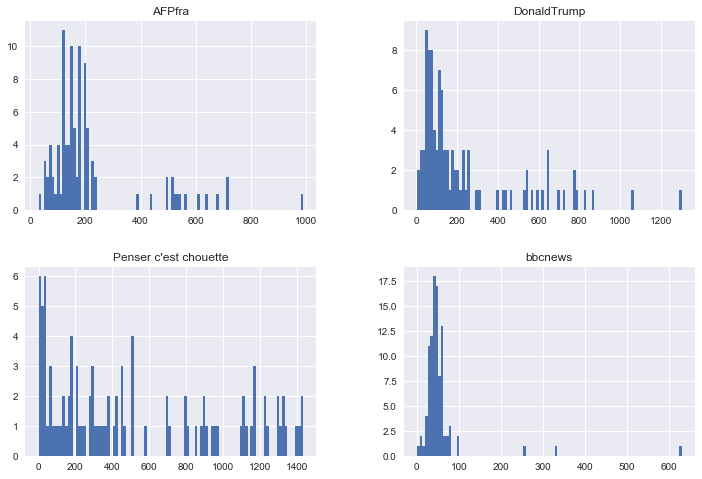

In [135]:
df_freq.hist(bins=100,figsize=(12,8))

In [128]:
X = df_freq["bbcnews"].values.reshape(-1,1)

In [129]:
kde = KernelDensity(kernel='exponential').fit(X)

In [130]:
kde.score_samples(X)

array([-3.77590594, -3.75564602, -4.55887019, -4.161352  , -3.45635046,
       -3.3994771 , -3.27668788, -4.57613742, -4.27404045, -3.13837664,
       -4.16554677, -3.23765529, -3.99284015, -3.16499752, -3.95283621,
       -5.24959815, -3.17925848, -3.99536022, -3.89329355, -5.18736703,
       -2.96287769, -3.0978251 , -2.96322409, -2.96026188, -3.35349737,
       -3.2322016 , -3.6494305 , -3.93567412, -3.53891133, -3.94809041,
       -3.18914192, -4.62127522, -3.89038254, -4.52806569, -4.2479721 ,
       -5.23524093, -3.16315511, -4.93713777, -3.61302485, -5.28826703,
       -3.2270108 , -3.22054515, -3.19542385, -3.47965971, -3.46120342,
       -3.4238283 , -4.61776957, -3.14046174, -3.19120032, -3.90918637,
       -4.38705135, -3.70743348, -3.63596688, -3.6494305 , -3.56758402,
       -3.76351807, -5.28826703, -3.67663065, -3.62906753, -3.12954936,
       -3.25327598, -3.14893459, -3.12387158, -5.24959851, -3.56570013,
       -3.23592261, -3.26177376, -4.25258367, -4.57695243, -4.10